## 순환 신경망으로 IMBD 리뷰 분류하기
+ 일반적으로 텍스트를 자체를 신경망에 주입하지는 않음
+ 텍스트 데이터는 데이터에 등장하는 단어마다 고유한 정수를 부여하는 방법 사용, 단어에 매핑되는 정수는 단어의 의미나 크기와 관련 X
+ 일반적으로 영어 문장은 구둣점을 삭제하고, 공백을 기준으로 분리한다. 이렇게 분리된 단어를 **토큰**이라 부른다.
+ 하나의 샘플은 여러 개의 토큰으로 이루어져 있고, 1개의 토큰이 하나의 타입스텝에 해당한다.<br>
***0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타내는 용도로 예약되어 있다.***

In [34]:
from tensorflow.keras.datasets import imdb

In [35]:
(train_input, train_target), (test_input, test_target) =\
    imdb.load_data(num_words = 300)

In [36]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


### 배열이 1차원인 이유?
+ 리뷰 길이는 제각각, 따라서 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용</br>
[리뷰1, 리뷰2, 리뷰3]과 같은 형태


In [37]:
print(len(train_input[0]), len(train_input[1]))

218 189


In [38]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [39]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### 타겟은 0(부정), 1(긍정)으로 이루어진 이진 분류 문제

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [42]:
import numpy as np

In [43]:
lengths = np.array([len(x) for x in train_input])

In [44]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


In [45]:
import matplotlib.pyplot as plt

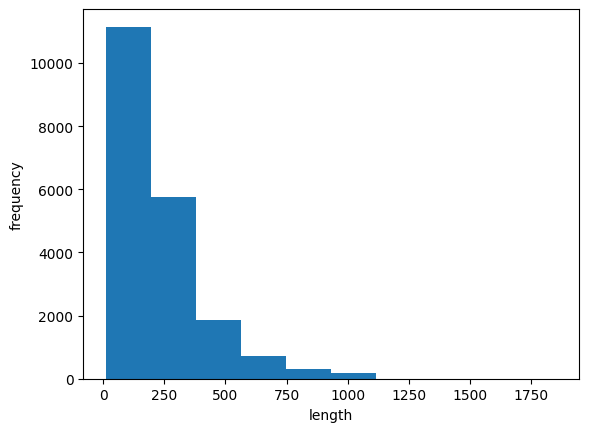

In [46]:
plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # 시퀀스 길이를 맞추는 함수

In [48]:
train_seq = pad_sequences(train_input, maxlen = 100) # 시퀀스 길이가 100보다 크면 잘라내고, 100보다 작으면 0으로 패딩

In [49]:
train_seq.shape

(20000, 100)

In [50]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [51]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [52]:
from tensorflow import keras

In [60]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 300)))
model.add(keras.layers.Dense(1, activation = 'sigmoid')) # 0, 1 이중 분류문제

c:\Users\cw3714\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### model.add(keras.layers.SimpleRNN(8, input_shape = (100, 300)))에서 300은?
+ 100은 이전에 샘플로 지정한 길이
+ 토큰을 정수로 변환한 값을 신경망에 주입하면 큰 수가 큰 출력을 만드는 문제
+ 정숫값에 있는 크기 속성을 없애고, 각 정수를 고유하게 표현하는 **원-핫인코딩**
<br></br>
### 원-핫 인코딩
+ 정숫값을 배열에서 해당 정수 위치의 원소만 1, 나머지를 0으로 변환
+ imdb.load_data()에서 단어를 300개만 사용하도록 지정, 따라서 원-핫 인코딩으로 표현하려면 배열의 길이가 300이여야 한다

In [54]:
train_oh = keras.utils.to_categorical(train_seq)

In [55]:
print(train_oh.shape)

(20000, 100, 300)


In [56]:
val_oh = keras.utils.to_categorical(val_seq)

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 32, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4936 - loss: 0.7026

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4937 - loss: 0.7026 - val_accuracy: 0.5092 - val_loss: 0.6949
Epoch 2/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5212 - loss: 0.6935

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5211 - loss: 0.6935 - val_accuracy: 0.5278 - val_loss: 0.6911
Epoch 3/100
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5335 - loss: 0.6894

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5335 - loss: 0.6894 - val_accuracy: 0.5430 - val_loss: 0.6878
Epoch 4/100
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5499 - loss: 0.6853

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5500 - loss: 0.6853 - val_accuracy: 0.5838 - val_loss: 0.6779
Epoch 5/100
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5968 - loss: 0.6698

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5969 - loss: 0.6698 - val_accuracy: 0.6262 - val_loss: 0.6551
Epoch 6/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6404 - loss: 0.6454

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6405 - loss: 0.6454 - val_accuracy: 0.6696 - val_loss: 0.6286
Epoch 7/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6701 - loss: 0.6248

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6702 - loss: 0.6247 - val_accuracy: 0.6856 - val_loss: 0.6095
Epoch 8/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6975 - loss: 0.5989

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6975 - loss: 0.5989 - val_accuracy: 0.7092 - val_loss: 0.5919
Epoch 9/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7097 - loss: 0.5856

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7097 - loss: 0.5856 - val_accuracy: 0.7226 - val_loss: 0.5764
Epoch 10/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7241 - loss: 0.5705 - val_accuracy: 0.7130 - val_loss: 0.5781
Epoch 11/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7253 - loss: 0.5623

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7253 - loss: 0.5623 - val_accuracy: 0.7294 - val_loss: 0.5564
Epoch 12/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7354 - loss: 0.5499

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7354 - loss: 0.5499 - val_accuracy: 0.7338 - val_loss: 0.5514
Epoch 13/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7393 - loss: 0.5441

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7393 - loss: 0.5441 - val_accuracy: 0.7348 - val_loss: 0.5437
Epoch 14/100
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7499 - loss: 0.5335

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7499 - loss: 0.5335 - val_accuracy: 0.7390 - val_loss: 0.5377
Epoch 15/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7475 - loss: 0.5327

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7475 - loss: 0.5327 - val_accuracy: 0.7436 - val_loss: 0.5322
Epoch 16/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7558 - loss: 0.5205

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7558 - loss: 0.5205 - val_accuracy: 0.7462 - val_loss: 0.5270
Epoch 17/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7549 - loss: 0.5198 - val_accuracy: 0.7494 - val_loss: 0.5291
Epoch 18/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7505 - loss: 0.5222

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7505 - loss: 0.5222 - val_accuracy: 0.7494 - val_loss: 0.5234
Epoch 19/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7602 - loss: 0.5120

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7602 - loss: 0.5120 - val_accuracy: 0.7502 - val_loss: 0.5202
Epoch 20/100
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7635 - loss: 0.5067

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7635 - loss: 0.5067 - val_accuracy: 0.7530 - val_loss: 0.5198
Epoch 21/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7579 - loss: 0.5126

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7579 - loss: 0.5126 - val_accuracy: 0.7500 - val_loss: 0.5191
Epoch 22/100
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7679 - loss: 0.5022

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7679 - loss: 0.5023 - val_accuracy: 0.7504 - val_loss: 0.5184
Epoch 23/100
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7627 - loss: 0.5036

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7627 - loss: 0.5036 - val_accuracy: 0.7522 - val_loss: 0.5165
Epoch 24/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7674 - loss: 0.4979 - val_accuracy: 0.7526 - val_loss: 0.5193
Epoch 25/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7622 - loss: 0.5042

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7623 - loss: 0.5042 - val_accuracy: 0.7526 - val_loss: 0.5153
Epoch 26/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7695 - loss: 0.4962

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7695 - loss: 0.4962 - val_accuracy: 0.7520 - val_loss: 0.5150
Epoch 27/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7704 - loss: 0.4937 - val_accuracy: 0.7512 - val_loss: 0.5164
Epoch 28/100
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7667 - loss: 0.4973

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7668 - loss: 0.4973 - val_accuracy: 0.7524 - val_loss: 0.5124
Epoch 29/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7712 - loss: 0.4943

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7712 - loss: 0.4943 - val_accuracy: 0.7518 - val_loss: 0.5120
Epoch 30/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7721 - loss: 0.4920 - val_accuracy: 0.7528 - val_loss: 0.5162
Epoch 31/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7734 - loss: 0.4912 - val_accuracy: 0.7538 - val_loss: 0.5177
Epoch 32/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7735 - loss: 0.4899 - val_accuracy: 0.7516 - val_loss: 0.5135


[]

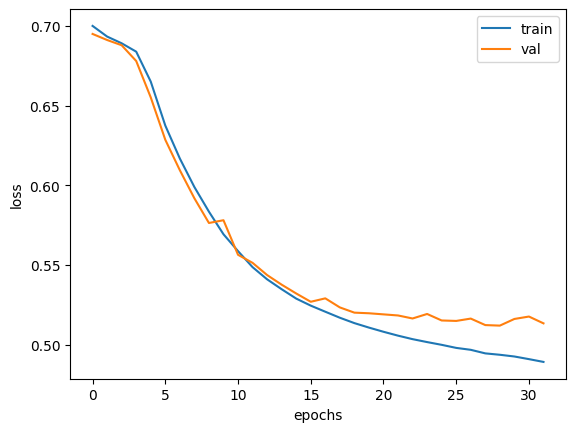

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.plot()

In [63]:
early_stopping_cb.best_epoch

28

In [64]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4800000000


## 단어 임베딩
+ 원-핫 인코딩의 단점은 입력 데이터가 굉장히 커진다는 단점이 있고, 훈련 데이터가 커질수록 더 문제가 될 수 있다.
+ 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꿔준다.
+ 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩의 경우보다 훨씬 의미있는 값으로 채워져 있기 때문에, 자연어 처리에서 더 좋은 성능을 내는 경우가 많음
---
## 단어 임베딩의 장점
+ 입력으로 정수 데이터를 받는다, train_seq 를 그대로 사용하기 때문에, 메모리를 훨씬 효율적으로 사용
+ 임베딩도 샘플을 2차원 배열로 늘리지만, 훨씬 작은 크기로도 단어를 잘 표현할 수 있다.

In [73]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length = 100))
# 임베딩 클래스의 첫번째 매개변수는 어휘 사전의 크기, 두 번째 매개변수는 임베딩 벡터의 크기, 세번째 매개변수는 입력 시퀀스의 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [74]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 32, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5388 - loss: 0.6899

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5389 - loss: 0.6898 - val_accuracy: 0.6626 - val_loss: 0.6468
Epoch 2/100
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6655 - loss: 0.6409

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6655 - loss: 0.6408 - val_accuracy: 0.6838 - val_loss: 0.6264
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7018 - loss: 0.6132

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7018 - loss: 0.6132 - val_accuracy: 0.7094 - val_loss: 0.5990
Epoch 4/100
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7111 - loss: 0.5929

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7111 - loss: 0.5929 - val_accuracy: 0.7206 - val_loss: 0.5790
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7293 - loss: 0.5704 - val_accuracy: 0.7058 - val_loss: 0.5829
Epoch 6/100
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7409 - loss: 0.5514

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7409 - loss: 0.5514 - val_accuracy: 0.7510 - val_loss: 0.5438
Epoch 7/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7485 - loss: 0.5367

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7485 - loss: 0.5366 - val_accuracy: 0.7420 - val_loss: 0.5324
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7585 - loss: 0.5215 - val_accuracy: 0.7378 - val_loss: 0.5349
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7629 - loss: 0.5116

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7629 - loss: 0.5116 - val_accuracy: 0.7490 - val_loss: 0.5229
Epoch 10/100
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7619 - loss: 0.5053

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7619 - loss: 0.5053 - val_accuracy: 0.7530 - val_loss: 0.5147
Epoch 11/100
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7720 - loss: 0.4928

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7720 - loss: 0.4928 - val_accuracy: 0.7540 - val_loss: 0.5090
Epoch 12/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7684 - loss: 0.4928 - val_accuracy: 0.7462 - val_loss: 0.5179
Epoch 13/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7713 - loss: 0.4898 - val_accuracy: 0.7454 - val_loss: 0.5111
Epoch 14/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7741 - loss: 0.4854 - val_accuracy: 0.7408 - val_loss: 0.5246


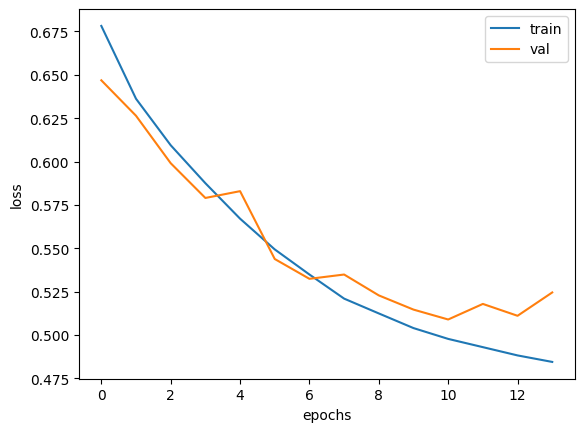

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()

In [77]:
early_stopping_cb.best_epoch

10